### I. Import Required Dependecies


In [48]:
import pandas as pd             # Pandas
import numpy as np              # NumPy
import matplotlib.pyplot as plt # Matplotlib

# Keras
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

### II. Mount Google Drive (Optional)


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### III. Evaluate Model (Test Set)

In [27]:
# Load the trained model
loaded_model = load_model('/content/drive/MyDrive/Breast Cancer Image Classification/model.h5')

# Set the path to the directory containing the test images
test_data_path = '/content/drive/MyDrive/Breast Cancer Image Classification/test_images'

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create a generator for the test data
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Convert accuracy to percentage
test_accuracy_percentage = test_accuracy * 100

# Create a Pandas DataFrame to display the result
evaluation_result = pd.DataFrame({
    'Set': ['Test'],
    'Loss': [test_loss],
    'Accuracy': [f'{test_accuracy_percentage:.2f}%']
})

# Display the evaluation result DataFrame
evaluation_result

Found 16 images belonging to 3 classes.


1/1 [==============================] - 9s 9s/step - loss: 0.6502 - accuracy: 0.8750


,Set,Loss,Accuracy
0,Test,0.650177,87.50%


**Display Model's Overall Accuracy**

In [28]:
# Display the overall accuracy
print(f"Overall Accuracy: {test_accuracy_percentage:.2f}%")

Overall Accuracy: 87.50%


### IV. Make Predictions (Classify Images)

1/1 [==============================] - 5s 5s/step
Real Class: malignant
Predicted Class: normal
"Incorrect"



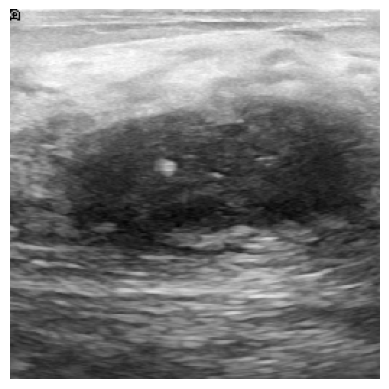

1/1 [==============================] - 0s 360ms/step
Real Class: normal
Predicted Class: normal
"Correct"



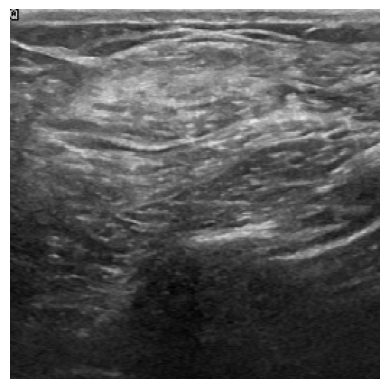

1/1 [==============================] - 0s 234ms/step
Real Class: benign
Predicted Class: benign
"Correct"



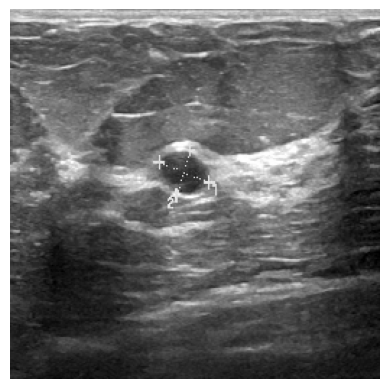

1/1 [==============================] - 0s 237ms/step
Real Class: malignant
Predicted Class: malignant
"Correct"



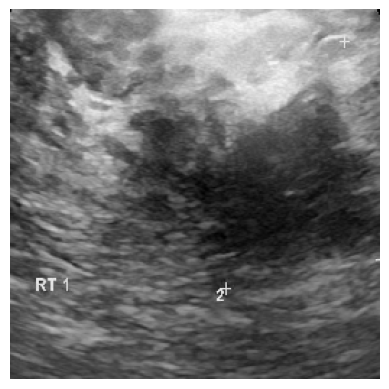

1/1 [==============================] - 0s 236ms/step
Real Class: benign
Predicted Class: benign
"Correct"



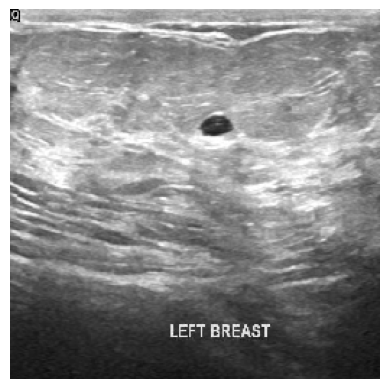

1/1 [==============================] - 0s 250ms/step
Real Class: normal
Predicted Class: normal
"Correct"



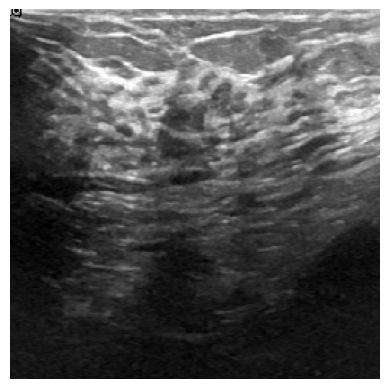


 5 out of 6 images are classified correctly.


In [49]:
# Load the trained model from the checkpoint file
loaded_model = keras.models.load_model('/content/drive/MyDrive/Breast Cancer Image Classification/model.h5')

# Define a list of image paths you want to classify
image_paths = [
    '/content/drive/MyDrive/Breast Cancer Image Classification/test_images/malignant/malignant (1).png',
    '/content/drive/MyDrive/Breast Cancer Image Classification/test_images/normal/normal (2).png',
    '/content/drive/MyDrive/Breast Cancer Image Classification/test_images/benign/benign (5).png',
    '/content/drive/MyDrive/Breast Cancer Image Classification/test_images/malignant/malignant (2).png',
    '/content/drive/MyDrive/Breast Cancer Image Classification/test_images/benign/benign (1).png',
    '/content/drive/MyDrive/Breast Cancer Image Classification/test_images/normal/normal (3).png',
]

# Initialize a counter for correct predictions
correct_predictions = 0

# Loop through each image path
for image_path in image_paths:
    # Extract the real class from the image path or any other source
    real_class = image_path.split('/')[-2]  # Adjust the split based on your directory structure

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Get the predicted class index
    predicted_label_index = np.argmax(predictions)

    # Map the predicted class index to the actual class label (if you have a mapping)
    class_labels = {0: 'benign', 1: 'malignant', 2: 'normal'}  # Update with your actual class labels
    predicted_label = class_labels.get(predicted_label_index, 'Unknown')

    # Check correctness
    correctness = '"Correct"' if real_class == predicted_label.lower() else '"Incorrect"'

    # Display the real class, predicted class, and correctness
    print(f'Real Class: {real_class}')
    print(f'Predicted Class: {predicted_label}')
    print(correctness)
    print()

    # Increment the correct predictions counter
    if correctness == '"Correct"':
        correct_predictions += 1

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels for better visualization
    plt.show()

# Display the overall correctness
print(f'\n {correct_predictions} out of {len(image_paths)} images are classified correctly.')